In [581]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [582]:
df = sns.load_dataset("iris")

In [583]:
df.shape

(150, 5)

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [585]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [586]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [587]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

For simplification, we drop one category

In [588]:
df.drop(df[df.species == "virginica"].index, axis = 0, inplace= True)

In [589]:
df.drop("sepal_length", axis =1, inplace = True)

In [590]:
df.drop("petal_width", axis =1, inplace = True)

In [591]:
encode = {"setosa":0, "versicolor":1}

In [592]:
df["species"] = df["species"].map(encode)

In [593]:
df.head()

,sepal_width,petal_length,species
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0


In [594]:
X = df.iloc[:, :-1].values

In [595]:
y = df.iloc[:, -1].values

In [596]:
from sklearn.model_selection import train_test_split

In [597]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [708]:
from sklearn.linear_model import LogisticRegression

In [709]:
log = LogisticRegression(solver= "sag", penalty= "none")

In [710]:
log.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='none', solver='sag')

In [711]:
y_pred = log.predict(X_test)

In [712]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [713]:
accuracy_score(y_test, y_pred)

1.0

In [714]:
log.score(X_train, y_train)

1.0

In [715]:
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 0, 10]], dtype=int64)

<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

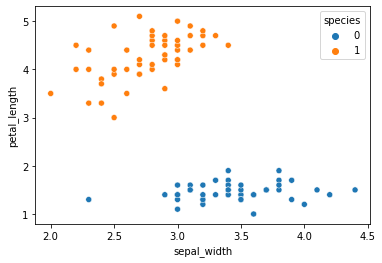

In [716]:
sns.scatterplot(x = df.iloc[:,0], y = df.iloc[:, 1], hue= df.iloc[:, -1])

In [717]:
df.head()

,sepal_width,petal_length,species
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0


In [718]:
df.shape

(100, 3)

Explicitly building logistic regression model

PERCEPTRON TRICK

In [719]:
def step(z):
    return 1 if z>0 else 0

In [720]:
def perceptron (X,y):
    X = np.insert(X,0,1, axis= 1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        id = np.random.randint(0, 80)
        y_pred_per = step(np.dot(X[id], weights))
        weights = weights + lr*(y[id]-y_pred_per)*X[id]
    
    return weights[0],weights[1:]
    

In [721]:
intercept_,coef_ = perceptron(X_train,y_train)

In [722]:
print(coef_)
print(intercept_)

[-0.56  0.59]
0.5000000000000001


Plotting Logistic regression of sklearn and perceptron trick

In [723]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [724]:
x_input = np.linspace(1,5,100)
y_input = m*x_input + b

In [725]:
m_log = -(log.coef_[0][0]/log.coef_[0][1])
b_log = -(log.intercept_/log.coef_[0][1])

In [726]:
x_input1 = np.linspace(1,5,100)
y_input1 = m_log*x_input + b_log

(1.0, 5.0)

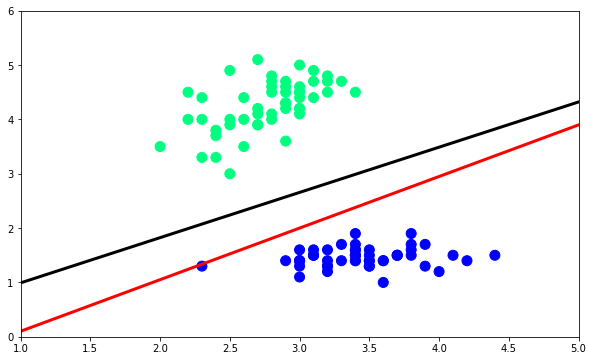

In [727]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(0,6)
plt.xlim(1,5)

Here we see that although the perceptron trick classifies the problem properly however it stops once all the points are correctly classified. On the other hand Logistic Regression of scikit learn optimizes further

SIGMOID FUNCTION

In [728]:
def sigmoid(z):
    return(1/(1+ np.exp(-z)))

In [729]:
def log_sigmoid (X,y):
    X = np.insert(X,0,1, axis= 1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        id = np.random.randint(0, 80)
        y_pred_sig = sigmoid(np.dot(X[id], weights))
        weights = weights + lr*(y[id]-y_pred_sig)*X[id]
    
    return weights[0],weights[1:]

In [730]:
intercept_s,coef_s = log_sigmoid(X_train,y_train)

In [731]:
print(coef_s)
print(intercept_s)

[-1.88378555  2.03313972]
0.2836083627599328


In [732]:
m_sig = -(coef_s[0]/coef_s[1])
b_sig = -(intercept_s/coef_s[1])

In [733]:
x_input_sig = np.linspace(1,5,100)
y_input_sig = m_sig*x_input_sig + b_sig

(1.0, 5.0)

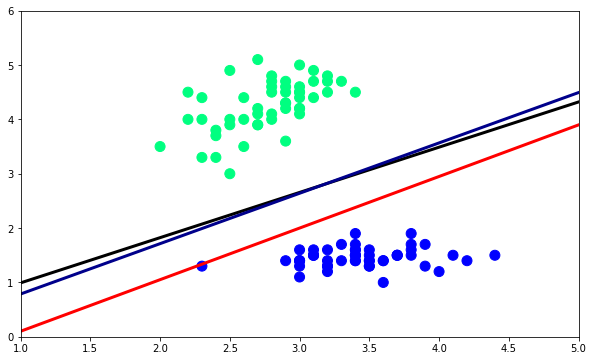

In [734]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input_sig,y_input_sig,color='darkblue',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(0,6)
plt.xlim(1,5)

Using Log Loss Function/ Binary Cross Entropy 

In [735]:
class Logistic_Regression:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.weights = None

    def fit (self, X_Train, y_Train, Learning_rate, max_iter):
        X_Train = np.insert(X_Train, 0, 1, axis = 1)
        self.weights = np.ones(X_Train.shape[1])
        for i in range (max_iter):
            y_Pred = sigmoid(np.dot(X_Train, self.weights))
            self.weights += Learning_rate*(1/X_Train.shape[0])*np.dot((y_Train - y_Pred), X_Train)
        self.coef_ = self.weights[1:]
        self.intercept_ = self.weights[0]
    
    def coefficient(self):
        return self.coef_
    
    def intercept(self):
        return self.intercept_

    def predict(self, X_Test):
        step(np.dot(X_Test, self.weights))


In [736]:
log_grad = Logistic_Regression()

In [743]:
log_grad.fit(X_train, y_train, Learning_rate= 0.1, max_iter= 1000)

In [744]:
coef_grad = log_grad.coefficient()
coef_grad

array([-2.80596764,  3.12262671])

In [745]:
intercept_grad = log_grad.intercept()

In [746]:
m_grad = -(coef_grad[0]/coef_grad[1])
b_grad = -(intercept_grad/coef_grad[1])

In [747]:
x_input_grad = np.linspace(1,5,100)
y_input_grad = m_grad*x_input_grad + b_grad

(1.0, 5.0)

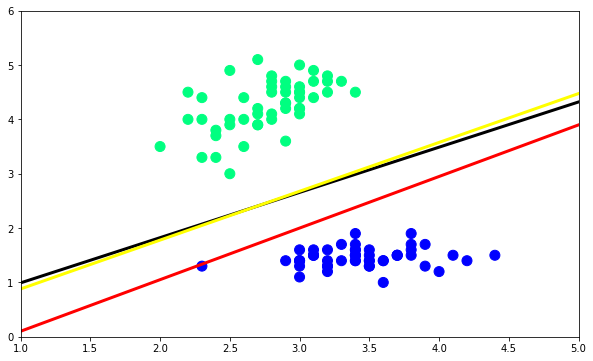

In [751]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
# plt.plot(x_input_sig,y_input_sig,color='darkblue',linewidth=3)
plt.plot(x_input_grad,y_input_grad,color='yellow',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(0,6)
plt.xlim(1,5)